In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [ ]:
#Load & read dataset
df = pd.read_csv("/Users/dangbaouyennhi/Documents/0.UEL/YEAR4/2.DataAnalyticsinEcom/Dataset3.csv", encoding="latin1")

In [ ]:
# Data Preparation
# First 10 values
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Year,Product
0,1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,2019,Critical Illness Coverage
1,2,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,2019,Vision Exams and Eyewear
2,3,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,2019,"Prescription Drugs Coverage, Hospitalization C..."
3,4,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0,2019,"Surgery Coverage, Emergency Room Visits, Mater..."
4,5,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0,2019,"Pediatric Services, Physical Therapy Coverage"
5,6,Female,24,1,3,1,< 1 Year,No,27619,152,28,0,2019,"Chiropractic Care Coverage, Home Healthcare Se..."
6,7,Female,32,1,6,1,< 1 Year,No,28771,152,80,0,2019,"Hospice Care Coverage, Medical Equipment and S..."
7,8,Female,24,1,50,1,< 1 Year,No,48699,152,289,0,2019,Preventive Services
8,9,Female,41,1,15,1,1-2 Year,No,31409,14,221,0,2019,Mental Health Coverage
9,10,Male,76,1,28,0,1-2 Year,Yes,36770,13,15,0,2019,"Dental Exams and Cleanings, Vision Exams and E..."


In [ ]:
# Last 10 values
df.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Year,Product
381099,381100,Male,28,1,47,0,1-2 Year,Yes,24961,154,164,1,2023,"Vision Exams and Eyewear, Surgery Coverage, Pe..."
381100,381101,Female,34,1,41,0,1-2 Year,Yes,2630,124,208,1,2023,"Chiropractic Care Coverage, Occupational Thera..."
381101,381102,Male,36,1,34,0,1-2 Year,Yes,31408,124,32,1,2023,"Pediatric Services, Speech Therapy Coverage, N..."
381102,381103,Female,36,1,28,0,1-2 Year,Yes,53840,152,242,1,2023,"Hospice Care Coverage, Diagnostic Tests Covera..."
381103,381104,Female,49,1,28,0,> 2 Years,Yes,33891,4,98,1,2023,"Critical Illness Coverage, Dental Exams and Cl..."
381104,381105,Male,40,1,46,0,1-2 Year,Yes,27508,26,189,1,2023,"Emergency Room Visits, Maternity and Newborn C..."
381105,381106,Female,41,1,28,0,1-2 Year,Yes,37377,124,99,1,2023,"Mental Health Coverage, Physical Therapy Cover..."
381106,381107,Female,46,1,28,0,1-2 Year,Yes,34741,124,167,1,2023,"Vision Exams and Eyewear, Surgery Coverage, Ho..."
381107,381108,Female,61,1,28,0,1-2 Year,Yes,43875,26,139,1,2023,"Preventive Services, Chiropractic Care Coverag..."
381108,381109,Female,38,1,28,0,1-2 Year,Yes,52742,26,165,1,2023,"Dental Exams and Cleanings, Prescription Drugs..."


In [ ]:
# Check the number of rows and columns
df.shape

(381109, 14)

In [ ]:
# Name of columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Year', 'Product'],
      dtype='object')

In [ ]:
# Check data types
df.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
Year                     int64
Product                 object
dtype: object

In [ ]:
# Data Checking
# Check for missing values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Year                    0
Product                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Display duplicate rows
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107    False
381108    False
Length: 381109, dtype: bool

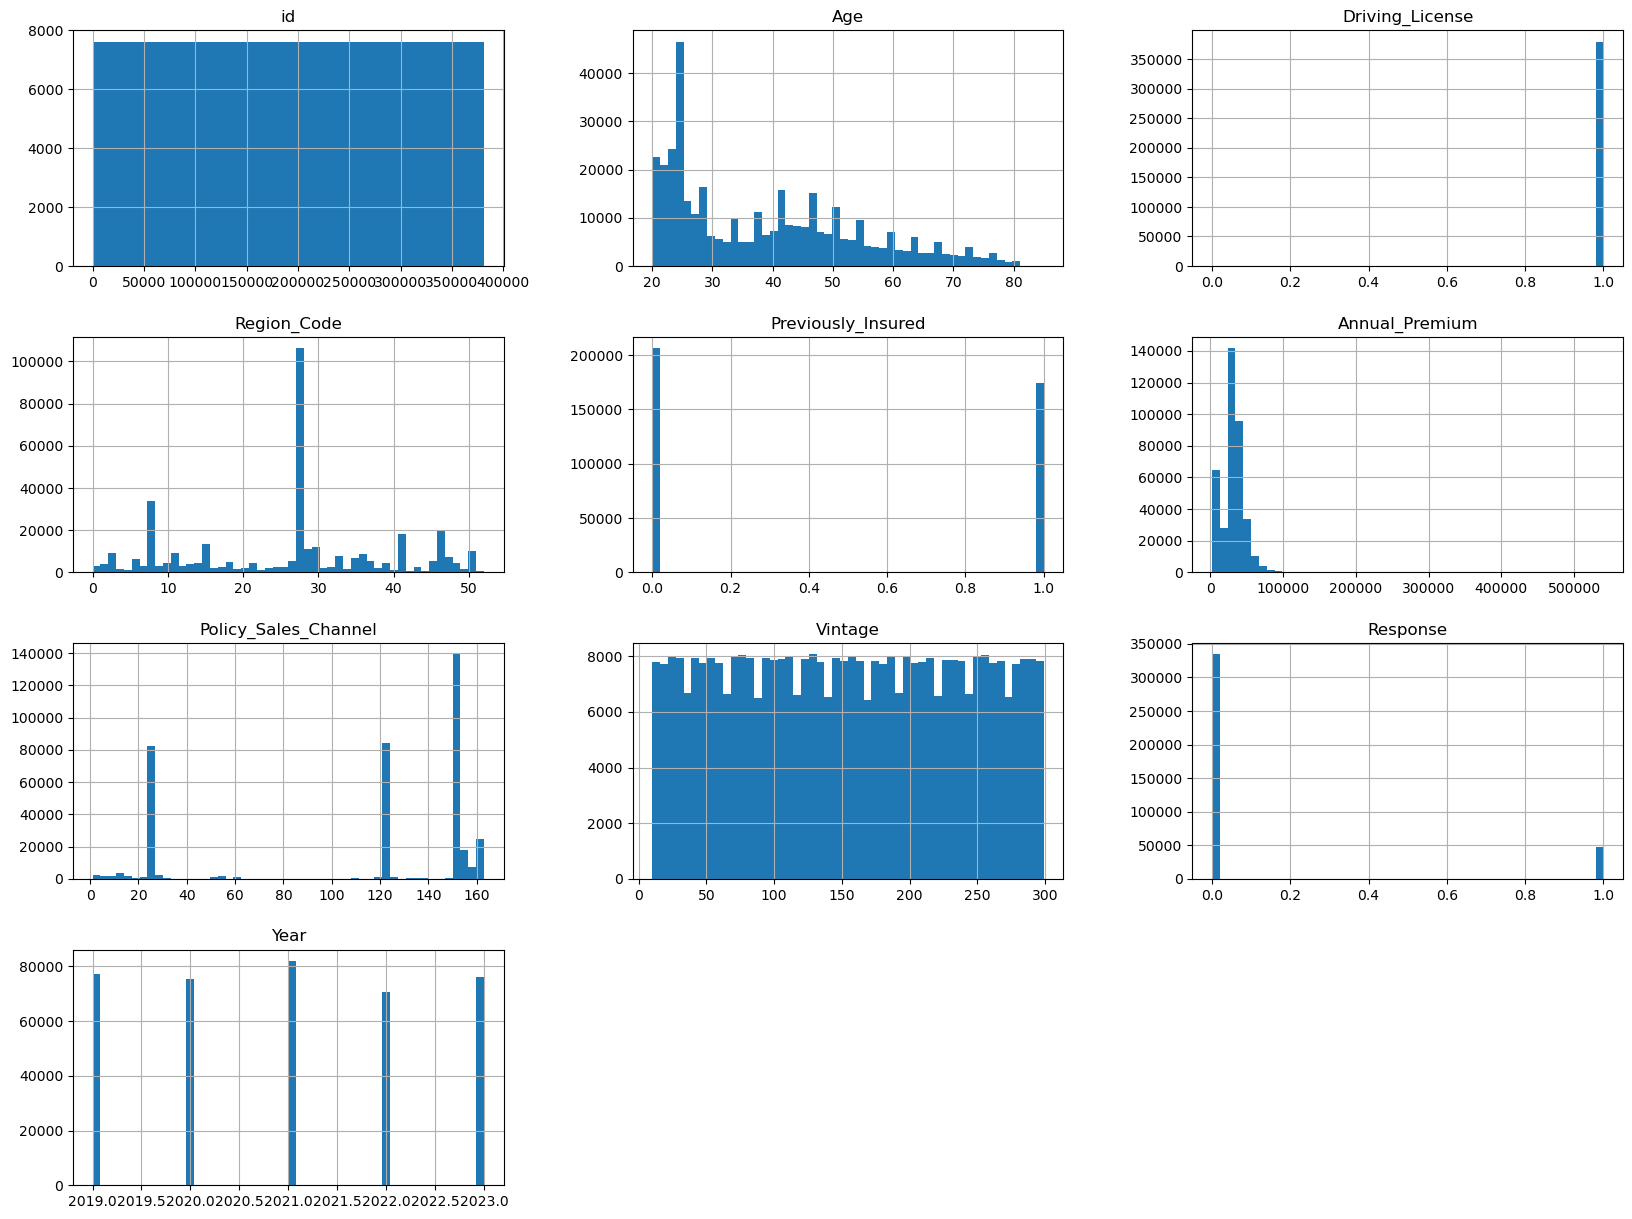

In [ ]:
#Visualize
# Histogram
df.hist(bins=50, figsize=(20, 15))
plt.show()

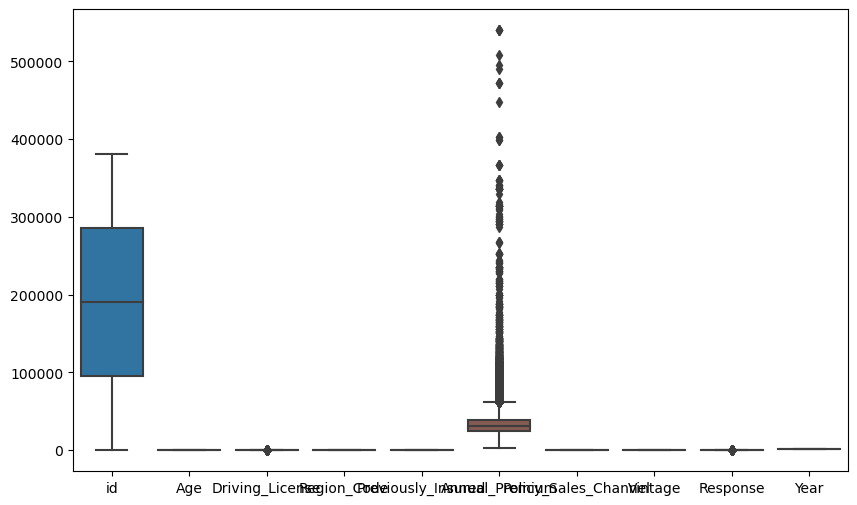

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

In [ ]:
#Perform outlier detection and treatment

#Detect Outliers
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
print(z_scores)

              id       Age  Driving_License  Region_Code  Previously_Insured  \
0       1.732046  2.396751         0.046208     1.767879            0.919638   
1       1.732037  1.148985         0.046208     1.163187            1.087384   
2       1.732028  0.633242         0.046208     1.104409            1.087384   
3       1.732019  0.955581         0.046208     0.499717            0.919638   
4       1.732010  1.020049         0.046208     1.163187            0.919638   
...          ...       ...              ...          ...                 ...   
381104  1.732010  0.075906         0.046208     1.482342            0.919638   
381105  1.732019  0.140374         0.046208     0.121784            0.919638   
381106  1.732028  0.462713         0.046208     0.121784            0.919638   
381107  1.732037  1.429732         0.046208     0.121784            0.919638   
381108  1.732046  0.053030         0.046208     0.121784            0.919638   

        Annual_Premium  Policy_Sales_Ch

In [ ]:
# Identify outliers (e.g., Z-score > 3)
outliers = np.where(z_scores > 3)
print("Outliers detected at indices:")
print(outliers)

Outliers detected at indices:
(array([   146,    155,    280, ..., 380820, 380835, 380910]), array([5, 5, 5, ..., 5, 5, 5]))


In [ ]:
#Treatment
# Remove rows containing outliers
df_cleaned = df[(z_scores < 3).all(axis=1)]

print("Dataset after removing outliers:")
print(df_cleaned)

Dataset after removing outliers:
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   76                1            3                   0   
1            2    Male   21                1           11                   1   
2            3  Female   29                1           41                   1   
3            4  Female   24                1           33                   0   
4            5    Male   23                1           11                   0   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   40                1           46                   0   
381105  381106  Female   41                1           28                   0   
381106  381107  Female   46                1           28                   0   
381107  381108  Female   61                1           28                   0   
381108  381109  Female   38                1           28                   

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Cap the outliers
df_capped = df.copy()
for col in df.select_dtypes(include=[np.number]).columns:
    upper_limit = Q3[col] + 1.5 * IQR[col]
    lower_limit = Q1[col] - 1.5 * IQR[col]
    df_capped[col] = np.where(df_capped[col] > upper_limit, upper_limit, df_capped[col])
    df_capped[col] = np.where(df_capped[col] < lower_limit, lower_limit, df_capped[col])

print("Dataset after capping outliers:")
print(df_capped)

Dataset after capping outliers:
              id  Gender   Age  Driving_License  Region_Code  \
0            1.0    Male  76.0              1.0          3.0   
1            2.0    Male  21.0              1.0         11.0   
2            3.0  Female  29.0              1.0         41.0   
3            4.0  Female  24.0              1.0         33.0   
4            5.0    Male  23.0              1.0         11.0   
...          ...     ...   ...              ...          ...   
381104  381105.0    Male  40.0              1.0         46.0   
381105  381106.0  Female  41.0              1.0         28.0   
381106  381107.0  Female  46.0              1.0         28.0   
381107  381108.0  Female  61.0              1.0         28.0   
381108  381109.0  Female  38.0              1.0         28.0   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                      0.0    1-2 Year             No         33536.0   
1                      1.0    < 1 Year             No

In [ ]:
#Feature Engineering

#Bin Annual Premium into groups
#1.Define bins and labels
bins = [0, 5000, 10000, 15000, 20000, 25000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High']

In [ ]:
# 2.Create a new column 'Premium_Bin' with the binned data
df['Premium_Bin'] = pd.cut(df['Annual_Premium'], bins=bins, labels=labels)

In [ ]:
# 3.Display the first few rows to verify
print(df[['Annual_Premium', 'Premium_Bin']].head())

   Annual_Premium     Premium_Bin
0           33536  Extremely High
1           28619  Extremely High
2           27496  Extremely High
3            2630        Very Low
4           23367       Very High


In [ ]:
#Create Age Generation Categories

#1.Define age ranges and labels
generation_bins = [0, 24, 39, 54, 74, float('inf')]
generation_labels = ['Gen Z', 'Millennials', 'Gen X', 'Boomers', 'Silent']

In [ ]:
# 2.Create a new column 'Age_Generation' with the categorized data
df['Age_Generation'] = pd.cut(df['Age'], bins=generation_bins, labels=generation_labels)

In [ ]:
# 3.Display the first few rows to verify
print(df[['Age', 'Age_Generation']].head())

   Age Age_Generation
0   76         Silent
1   21          Gen Z
2   29    Millennials
3   24          Gen Z
4   23          Gen Z


In [ ]:
print(df)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   76                1            3                   0   
1            2    Male   21                1           11                   1   
2            3  Female   29                1           41                   1   
3            4  Female   24                1           33                   0   
4            5    Male   23                1           11                   0   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   40                1           46                   0   
381105  381106  Female   41                1           28                   0   
381106  381107  Female   46                1           28                   0   
381107  381108  Female   61                1           28                   0   
381108  381109  Female   38                1           28                   0   

       Vehicle_Age Vehicle_

In [ ]:
# Check Overall

#data types
df.dtypes

id                         int64
Gender                    object
Age                        int64
Driving_License            int64
Region_Code                int64
Previously_Insured         int64
Vehicle_Age               object
Vehicle_Damage            object
Annual_Premium             int64
Policy_Sales_Channel       int64
Vintage                    int64
Response                   int64
Year                       int64
Product                   object
Premium_Bin             category
Age_Generation          category
dtype: object

In [ ]:
# DataFrame's index
df.index

RangeIndex(start=0, stop=381109, step=1)

In [ ]:
# Memory usage
df.memory_usage(deep=True)

Index                        128
id                       3048872
Gender                  23597689
Age                      3048872
Driving_License          3048872
Region_Code              3048872
Previously_Insured       3048872
Vehicle_Age             24788092
Vehicle_Damage          22677844
Annual_Premium           3048872
Policy_Sales_Channel     3048872
Vintage                  3048872
Response                 3048872
Year                     3048872
Product                 42370062
Premium_Bin               381667
Age_Generation            381600
dtype: int64

/Users/dangbaouyennhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dangbaouyennhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dangbaouyennhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

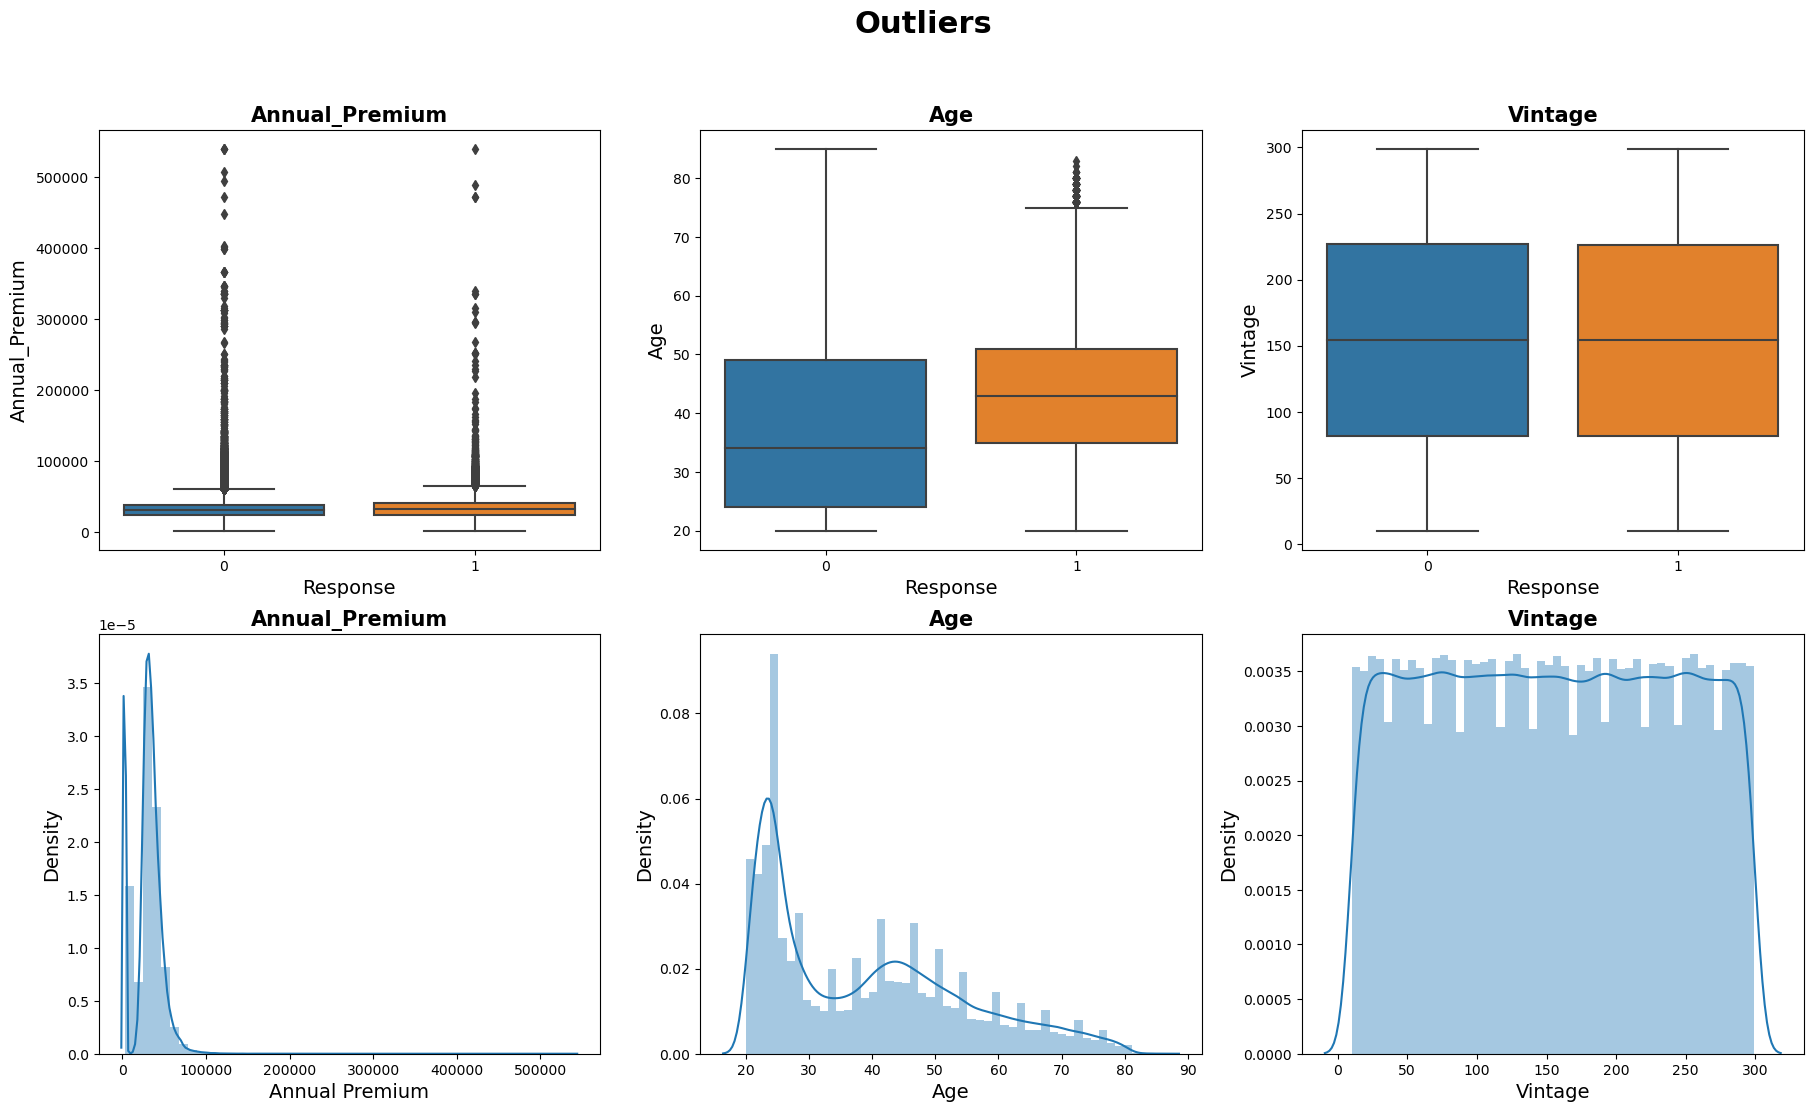

In [ ]:
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(df)

In [ ]:
# Export the DataFrame to a new CSV file
df.to_csv("/Users/dangbaouyennhi/Documents/0.UEL/YEAR4/2.DataAnalyticsinEcom/Pre-processingDataset(1).csv")